<a href="https://colab.research.google.com/github/JovanBosic/Master-rad/blob/main/Master_rad_projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuronske mreze

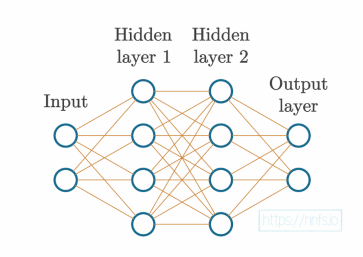

U skrivenom i izlaznom layer-u svaki neuron je povezan sa svim neuronima iz prethodnog layer-a. Te veze sa  neuronima iz prethodnog layer-a, odnosno ulazi u neuron u narednom layer-u imaju svoju tezinu (weights) koji se mnozi sa tim ulaznim vrednostima u neuron. Sam neuron ima svoj bias koji se sabira sa prethodno pomenutim proizvodom.  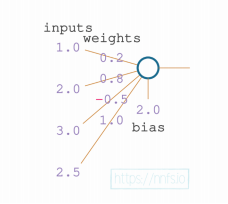

In [ ]:
# Pseudo kod
output=inputs[0]*weights[0]+bias
      +inputs[1]*weights[1]+bias
      +inputs[2]*weights[2]+bias
      +inputs[3]*weights[3]+bias

In [ ]:
# Napomena **shape** za **numpy** biblioteku:

import numpy as np

l=[1,2,3,4]
print("1D",np.array(l).shape)

l=[[1,2,3,4],
   [1,2,3,4]]
print("2D",np.array(l).shape)

l=[[[1,2],
    [1,2]],
   [[1,2],
    [1,2]],
   [[1,2],
    [1,2]]]
print("3D",np.array(l).shape)
 

1D (4,)
2D (2, 4)
3D (3, 2, 2)



Mnozenje vektora sa matricama odnosno matrica sa matricama se radi pomocu **dot_product**-a

In [ ]:
import numpy as np

a=[1,2,3]
b=[2,3,4]
dot_product=a[0]*b[0]+a[1]*b[1]+a[2]*b[2]
print(dot_product)


inputs=[1,2,3,2.5]
weights=[0.2,0.8,-0.5,1]
bias=2

output=np.dot(weights,inputs)+bias
print(output)

20
4.8


**output=weight*input+bias <=> y=ax+m**




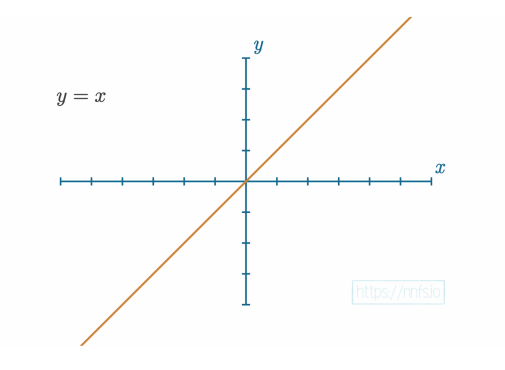

## Matrice

Mnozenje matrica

red*kolona

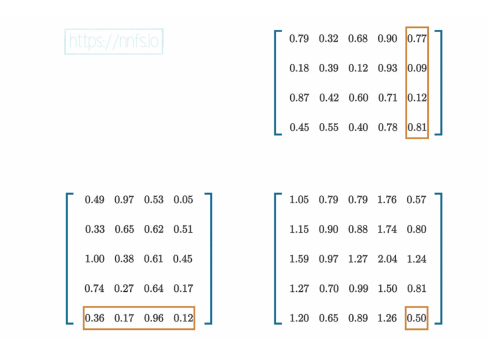

Transponovanje matrica

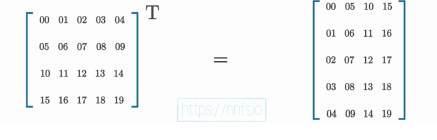

In [ ]:
# Inputs - inputs se obicno skaliraju da budu u vrednosti izmedju -1 i 1 ili 0 i 1
# Number of imputs = broj vrsta = 4
import numpy as np
X=[[1,2,3,2.5],
   [2,5,-1,2],
   [-1.5,2.7,3.3,-0.8]]

class Layer_Dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights=0.10*np.random.randn(n_inputs,n_neurons)       # mnozimo sa 0.10 kako bi sve vrednosti 
                                                                # u mrezi bile izmedju -1 i 1,
                                                                # broj n_inputs odnosno ulaza je 4
    self.biases=np.zeros((1,n_neurons))                           
    

  def forward(self,inputs):
    self.output=np.dot(inputs,self.weights)+self.biases


layer1=Layer_Dense(4,5)# Prvi broj (4) pokazuje koliko razlicitih ulaza ima(senzor temperature,pritiska,vlaznosti,ultrazvucni)
layer2=Layer_Dense(5,2)# Drugi broj (5) iz prethodnoh layera mora da se slaze sa prvim brojem u narednom (5)
layer1.forward(X)# Postoje X matrica 3x4 a layer1 4x5 izlaz je 3x5
layer2.forward(layer1.output)
print(layer2.output)

print(np.zeros((1,5)))

[[-0.0488325  -0.21852593]
 [ 0.11385356 -0.19431037]
 [-0.09514343  0.04872591]]
[[0. 0. 0. 0. 0.]]


## Aktivacione funkcije

**Step funckija**

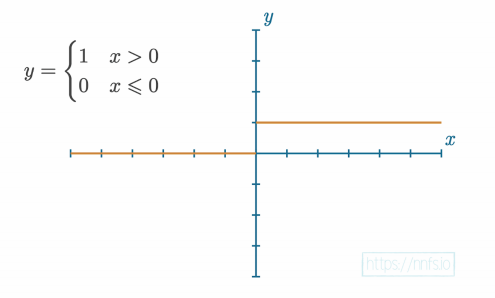

**Sigmoid**


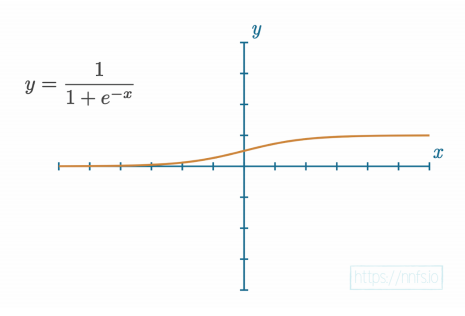

y=(0,1) znamo koliko smo blizu 0 odnosno 1



**Rampa (ReLU)**

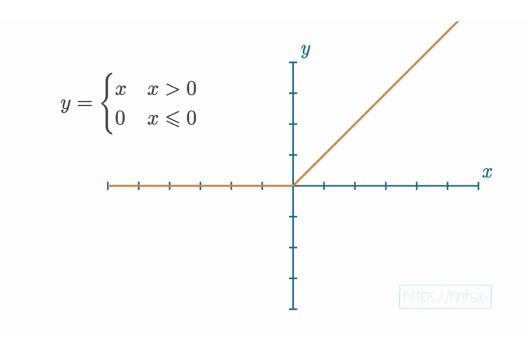

Najpopularnija za skrivene slojeve

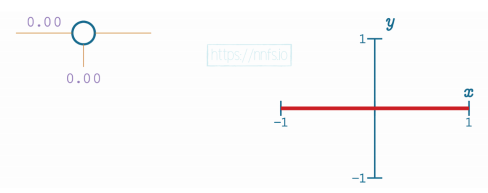

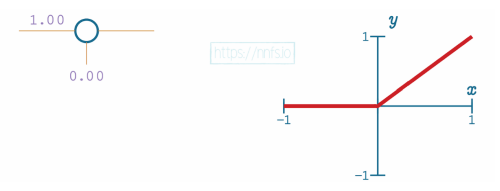

Bias pomera funkciju horizontalno, povecanjem bias-a funkcija se aktivira ranije 

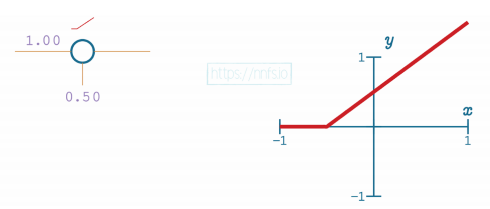

Weigth utice na nagib - deaktivacija

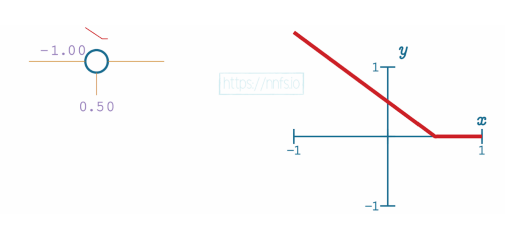

```
z=n*x+m=-1*x+0.5

y=z*p+r=-1*x+0.5+1=-1*x+1.5
```

Kod drugog neurona bias funkciju pomera vertikalno

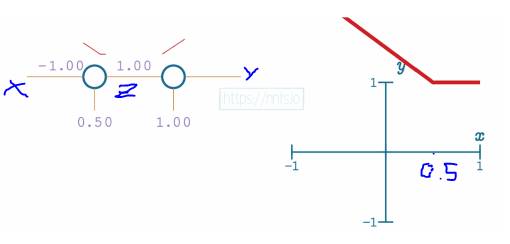

Funkcija se prvo pomeri u levo zbog prvog bias-a za 0.5, zatim se horizontalno flipuje zbog prvog weigth-a, nakon toga funckija se podize za 1 vertikalno navise zbog drugog bias-a, a potom se flipuje vertikalno zbog drugog weight-a

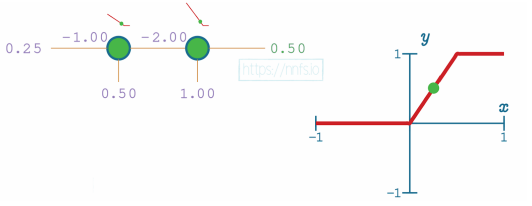

In [ ]:
class Activation_ReLU:
  def forward(self,inputs):
    self.output=np.maximum(0,inputs)

**Softmax aktivaciona funckija**

Koristi se za output layer, govori koliko je nesto tacno ili nije tacno.

$S_{ij}= \frac{e^{z_{ij}}}{ \sum_{l=1}^{L} e^{z_{il}}} $

Prvo se uradio eksponencijalna vrednost od izlaza,
zatim se radi normalizacija, gde se svaka eksponencijalna vrednost od izlaza deli sa sumom svih eksponencijalnih vrednosti izlaza.

In [ ]:
# Pseudo kod

layer_outputs=[4.8,1.21,2.385]

exp_values=np.exp(layer_outputs)

norm_values=exp_values/np.sum(exp_values)

# Kada je izlaz matrica onda ide sledeci kod:   
    # norm_values=exp_values/np.sum(exp_values, axis=1, keepdims=True)

  # jer nama treba izlaz u oblicu []

                                 #[]

                                 #[]
 
  # a ne u [     ] ovom obliku


Posto je $e^x$ jako velik broj kada je x velik i idemo u overflow jako brzo, onda nadjemo najveci izlaz i svaki od izlaza oduzmemo sa njim. Tada nam je najveci  izlaz 0 a eksponencijalne vrednosti se krecu izmedju 1 i 0

In [ ]:
class Activation_Softmax:
  def forward(self,inputs):
    exp_values=np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
    probabilities=exp_values/np.sum(exp_values,axis=1,keepdims=True)
    self.out=probabilities

# X,y= spiral_data(samples=100, classes=3)

dense1=Layer_Dense(2,3)
activation1=Activation_ReLU()

dense2=Layer_Dense(3,3)
activation2=Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

## Loss

Racunanje gubitka odnosno koliko je nas model netacan

Neophodno za optimizaciju

Categorical cross entropy loss

$L_{i}=- \sum_{j} y_{i,j}*log(\hat{y}_{i,j})$

$L_{i}$= vrednost gubitka uzorka

$i$= i-ti uzorak iz set-a

$j$= index izlaza

$y$= zeljenja vrednost

$\hat{y}$= pretpostavljena vrednost

$L_{i}=-log(\hat{y}_{i,k})$

$k$= indeks tacnosti pretpostavljenje klase

---

One hot encoding vector - vekto duzine broja izlaznih klasa, popunjen 0 osim mesta targetovanja, gde je vrednost 1

classes: 4

label: 2 - index

one-hot: [0,0,1,0]

idexi: 0 1 2 3

---
classes: 3

label: 0

one-hoy: [1 0 0]

prediction: [0.7, 0.1, 0.2]

$L=-\sum_{j}y_{j}*log(\hat{y}_{j})=-(1*log(0.7)+0*log(0.1)+0*log(0.2))=0.357$

Sto je sigurnost u rezultat veca to je greska manja, da je sigurnost 1, log(1)=0 - nema greske

In [ ]:
# Kada imam matricu izlaza
#                 indexi  0    1    2 
import numpy as np

softmax_outputs=np.array([[0.7,0.1,0.2],
                         [0.1,0.5,0.4],
                         [0.02,0.9,0.08]])

# Neki je prvi neuron tacnost da je na ulaznoj slici pas, drugi macka a treci covek
# Tada je class_target=[0,1,1] - ovo su izlazni neuroni sa najvecom tacnoscu

class_targets=[0,1,1]
for targ_idx, distribution in zip(class_targets,softmax_outputs):
  print("Targetovani izlazi",distribution[targ_idx])

# Moze i
# print(len(softmax_outputs))
print("Targetovani izlazi",softmax_outputs[range(len(softmax_outputs)),class_targets])

# Dodajemo negativni logaritam za racunanje gubitaka
print("Gubitci",-np.log(softmax_outputs[range(len(softmax_outputs)),class_targets]))

# Na kraju racunamo srednju vrednost gubitaka kako bi znali koliko dobro se nas model trenira
neg_log=-np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])
average_loss=np.mean(neg_log) # sabere sve gubitke i podeli ih sa brojem koliko gubitaka ima
print("Srednja vrednost gubitaka",average_loss)


Targetovani izlazi 0.7
Targetovani izlazi 0.5
Targetovani izlazi 0.9
Targetovani izlazi [0.7 0.5 0.9]
Gubitci [0.35667494 0.69314718 0.10536052]
Srednja vrednost gubitaka 0.38506088005216804


---

In [ ]:
# Kada je one-hot encoded vector ustbari 2D matrica kod je sledeci:

softmax_outputs=np.array([[0.7,0.1,0.2],
                         [0.1,0.5,0.4],
                         [0.02,0.9,0.08]])
class_targets=np.array([[1,0,0],
                        [0,1,0],
                        [0,1,0]])

print("Dimenzije matrice",len(class_targets.shape)) # Vraca dimenziju matrice

if len(class_targets.shape)==1:
  correct_confidences=softmax_outputs[range(len(softmax_outputs)),class_targets]

elif len(class_targets.shape)==2:
  correct_confidences=np.sum(softmax_outputs*class_targets,axis=1)

print(correct_confidences)


Dimenzije matrice 2
[0.7 0.5 0.9]


Kada model omasi u pretpostavci i na primer kaze da je najvise siguran u vrednost koja je pogresna, automatski target za tu vrednost je 0, a program ne moze da izracuna logaritam od 0 jer on ne postoji i zato se radi ogranicenje koje ce vrednost 0 postaviti a vrednost jako bliku nuli kako bi se logaritam mogao izvrsiti.



```
y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)
```
Sada je minimalan donji broj jako blizu nuli a maksimalan gornji jako blizu 1.

----


Racunanje tacnosti modela: koliko cesto je izlaz sa najvecom sigurnosti i tacan izlaz

In [ ]:
softmax_outputs=np.array([[0.7,0.1,0.2],
                         [0.1,0.5,0.4],
                         [0.02,0.9,0.08]])
class_targets=np.array([0,1,1])

predictions= np.argmax(softmax_outputs) # Vrati index najveceg clana matrice tako sto se krece 
                                        # horizontalno,pa kad dodje do kraja ode 1 red dole
print("Index najveceg clana matrice",predictions)
predictions= np.argmax(softmax_outputs,axis=0)
print("Indexi najvecih clanova po vrstama odnosno gledajuci vertikalno",predictions)
predictions1= np.argmax(softmax_outputs,axis=1)
print("Indexi najvecih clanova po redu odnosno gledajuci horizontalno",predictions1)

Index najveceg clana matrice 7
Indexi najvecih clanova po vrstama odnosno gledajuci vertikalno [0 2 1]
Indexi najvecih clanova po redu odnosno gledajuci horizontalno [0 1 1]


In [ ]:


if len(class_targets.shape)==2:
  class_targets=np.argmax(class_targets,axis=1)

print(class_targets)

accuracy=np.mean(predictions1==class_targets) #True = 1, False = 0, poredi sve elemente,
                                              #sabere, i podeli sa brojem sabiraka

print(accuracy)

[0 1 1]
1.0


## Optimizacija

Imamo neuronsku mrezu, kroz koju teku podaci, koja racuna gubitke odnosno odstupanja, sledeci korak je da prilagodimo weights i biaes uz pomoc optimizacije kako bi smanjili gresku. Ovo je glavni problem neuronskih mreza.

Svi weights i biases imaju drugaciji stepen uticaja na gresku.

Greska se racuna na osnovu vrednosti izlaza iz modela,a izlaz iz modela zavisi od weights i biases u modelu.


### Backpropagation

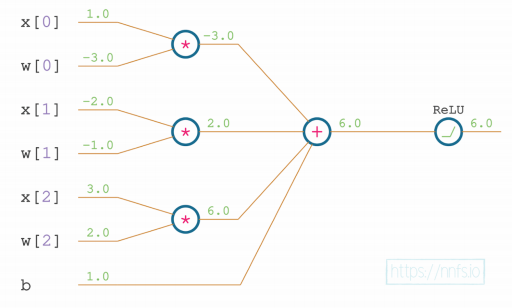

$y=ReLU((\sum_{i=0}^n w_i*input_i)+bias)$

$ \frac{dy}{dx_0}=\frac{dReLU()}{dsum()}* \frac{dsum()}{dmul(x_0,w_0)}*\frac{dmul(x_0,w_0)}{dx_0}$

Iz prethodnog layer-a dobijemo dvalue, koja je u nasem primeru recimo 1, zatim radi izvod Relu funkije koji je 1 kada je z>0 ako je fukcija oblika $f(z)=max(z,0)$ zatim se taj izvod mnozi sa prethodnom jedinicom, onda radimo izvod sume po svim sabircima i biasu, a vrednost  svakog od tih izvoda je 1 i kada ga pomnozimom sa prethodnom jedinicom ostane nam 1, i na kraju radimo izvod proizvoda izmedju weight-a i input-a, gde je $f(x,y)=x*y$ dobijemo da je izvod funkcije po x usvari y a izvod funkcije po y ustvaru x.


In [ ]:
dx=[drelu_dx0,drelu_dx1,drelu_dx2]=[-3,-1,2]
dw=[drelu_dw0,drelu_dw1,drelu_dw2]=[1,-2,3]
db=drelu_db=1

x=[1,-2,3]
w=[-3,-1,2]
b=1
m=max(x[0]*w[0]+x[1]*w[1]+x[2]*w[2]+b,0)
print(w,b)
print(m)

w[0]+=-0.001*dw[0]
w[1]+=-0.001*dw[1]
w[2]+=-0.001*dw[2]

b+=-0.001*db

xw0=x[0]*w[0]
xw1=x[1]*w[1]
xw2=x[2]*w[2]

z=xw0+xw1+xw2+b

y=max(z,0)

print(y)



[-3, -1, 2] 1
6
5.985


Smanjili smo vrednost izlaza (ranije je  bio 6 a sad je 5.985), u realnom sistemu ovo nema smisla, vec se parametri mreze menjaju kako bi se smanjila greska. Greska je poslednja koja se racuna kroz forward pass, a prva koja nam sluzi u procesu backpropagation.

---
**Racunanje gradijenta funkcije neurona u odnosu na ulaze**



In [ ]:
import numpy as np

dvalues=np.array([[1,1,1],
                 [2,2,2],
                 [3,3,3]])
weights=np.array([[0.2,0.8,-0.5,1],
                 [0.5,-0.91,0.26,-0.5],
                 [-0.26,-0.27,0.17,0.87]])
dinputs=np.dot(dvalues,weights)
print(dinputs)
print(dinputs.shape)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]
(3, 4)


---
**Racunanje gradijenta funkcije neurona u odnosu na weights**


U ovom slucaju  koristimo gradijent da bismo update-ovali weights, tako da treba da potrefimo oblik weights, ne ulaza.

In [ ]:
import numpy as np

dvalues=np.array([[1,1,1],
                  [2,2,2],
                  [3,3,3]])
inputs=np.array([[1,2,3,2.5],
                 [2,5,-1,2],
                 [-1.5,2.7,3.3,-0.8]])
dweights=np.dot(inputs.T,dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


**Racunanje gradijenta funkcije u odnosu na bias**

In [ ]:
dvalues=np.array([[1,1,1],
                  [2,2,2],
                  [3,3,3]])
biases=np.array([[2,3,0.5]])
dbiases=np.sum(dvalues,axis=0,keepdims=True)
dbiases1=np.sum(dvalues,axis=0)
print(dbiases)
print(dbiases1)

[[6 6 6]]
[6 6 6]


**Izvod rampa funkcije**


In [ ]:
z=np.array([[1,2,-3,-4],
            [2,-7,-1,3],
            [-1,2,5,-1]])
dvalues=np.array([[1,2,3,4],
                  [5,6,7,8],
                  [9,10,11,12]])
drelu=dvalues.copy()
drelu[z<=0]=0
print(drelu)

[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


**Izvod kategoricne unakrsne entropije gubitaka**

$L_i=-log(\hat{y}_{i,k})$


$k$-indeks prave verovatnoce (index of the target label)

$L_i=-\sum_{j}y_{i,j}*log(\hat{y}_{i,j})$

$y$-trazena vrednost

$\hat{y}$-predvidjena vrednost

$L_i$-vrednoost greske i-tog clana

$j$-output index

$i$-broj sampla u setu

Trazimo:

$\frac{dL_i}{d\hat{y}_{i,j}}= \frac{d}{d\hat{y}_{i,j}}*[-\sum y_{i,j}log(\hat{y}_{i,j})]=-\sum y_{i,j}* \frac{d}{d\hat{y}_{i,j}}log(d\hat{y}_{i,j})=-\sum y_{i,j}* \frac{1}{\hat{y}_{i,j}}$

Posto radimo parcijalni izvod u odnosu na dato y, suma koja se izvodi nad 1 elementom se zanemarljuje.

$=>-y_{i,j}* \frac{1}{\hat{y}_{i,j}}$



In [ ]:
class Loss_CategoricalCrossentropy(Loss):
  def backward(self,dvalues,y_true):
    samples=len(dvalues)
    labels=len(dvalues[0])
    if len(y_true.shape)==1:
      y_true=np.eye(label)[y_true]

    self.dinputs=-y_true/dvalues # Racunanje gradijenta
    self.dinputs=self.dinputs/samples # Normalizacija

In [ ]:
print(np.eye(5))

print(np.eye(5)[1])

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[0. 1. 0. 0. 0.]


**Izvod Softmax aktivacione funkcije**

$$S_{i,j}=\frac{e^{z_{i,j}}}{\sum_{l=1}^L e^{z_{i,l}}}$$

$$\frac{dS_{i,j}}{dz_{i,k}}=\frac{d}{dz_{i,k}}*\frac{e^{z_{i,j}}}{\sum_{l=1}^L e^{z_{i,l}}}=\frac{\frac{de^{z_{i,j}}}{dz_{i,k}}*\sum_{l=1}^L e^{z_{i,l}}-e^{z_{i,j}}*\frac{d\sum_{l=1}^L e^{z_{i,l}}}{dz_{i,k}}}{(\sum_{l=1}^L e^{z_{i,l}})^2}$$

$$=>\frac{d\sum_{l=1}^L e^{z_{i,l}}}{dz_{i,k}}=\frac{de^{z_{i,1}}}{dz_{i,k}}+\frac{de^{z_{i,2}}}{dz_{i,k}}+\frac{de^{z_{i,3}}}{dz_{i,k}}+...+\frac{de^{z_{i,k}}}{dz_{i,k}}+...+\frac{de^{z_{i,L}}}{dz_{i,k}}=0+0+0+...+e^{z_{i,k}}+0+...+0=e^{z_{i,k}}$$

$$=>\frac{de^{z_{i,j}}}{dz_{i,k}}=$$

$1) j==k  ->  e^{z_{i,j}}$

$2) j!=k -> 0$

$$j==k => \frac{dS_{i,j}}{dz_{i,k}}=\frac{e^{z_{i,j}}*\sum_{l=1}^L e^{z_{i,l}}-e^{z_{i,j}}*e^{z_{i,k}}}{(\sum_{l=1}^L e^{z_{i,l}})^2}=\frac{e^{z_{i,j}}}{\sum_{l=1}^L e^{z_{i,l}}}-\frac{e^{z_{i,j}}*e^{z_{i,k}}}{(\sum_{l=1}^L e^{z_{i,l}})^2}=S_{i,j}-S_{i,j}*S_{i,k}=S_{i,j}*(1-S_{i,k})$$

$$j!=k => -\frac{e^{z_{i,j}}*e^{z_{i,k}}}{(\sum_{l=1}^L e^{z_{i,l}})^2}=-S_{i,j}*S_{i,k}=S_{i,j}*(0-S_{i,k})$$

$$b_{i,j} =
 \begin{pmatrix}
  1 & => & i=j \\
  0 & => & i!=j\\
 \end{pmatrix}$$

 $$\frac{dS_{i,j}}{dz_{i,k}}=S_{i,j}*(b_{j,k}-S_{i,k})=S_{i,j}*b_{j,k}-S_{i,j}*S_{i,k}$$




In [ ]:
# Pseudo kod

softmax_output=[0.7,0.1,0.2]

import numpy as np

softmax_output=np.array(softmax_output).reshape(-1,1)
print(softmax_output)

print(np.eye(softmax_output.shape[0])) #3 reda

#b_i,j=1 kada je i=j u suprotnom 0

print("Sporija verzija")
print(softmax_output*np.eye(softmax_output.shape[0]))  #S_i,j*b_j,k

#brze =)
print("Brza verzija")
print(np.diagflat(softmax_output))

print("Drugi deo")
print(np.dot(softmax_output,softmax_output.T)) #S_i,j*S_i,k

print("Cela formula")
print(np.diagflat(softmax_output)-np.dot(softmax_output,softmax_output.T)) #Jakobijan

[[0.7]
 [0.1]
 [0.2]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Sporija verzija
[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]
Brza verzija
[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]
Drugi deo
[[0.49 0.07 0.14]
 [0.07 0.01 0.02]
 [0.14 0.02 0.04]]
Cela formula
[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]


In [ ]:
class Activation_SoftMax:
  def backward(self,dvalues):
    self.dinputs=np.empty_like(dvalues)

    for index,(single_output,single_dvalues) in enumerate(zip(self.output,dvalues)):

      single_output=single_output.reshape(-1,1)
      jacobian_matrix=np.diagflat(single_output)-np.dot(single_output,single_output.T)

      self.dinputs[index]=np.dot(jacobian_matrix,single_dvalues)

Prvo smo kreirali prazan niz (koji će postati rezultujući niz gradijenata) istog oblika kao i gradijenti koje primamo da primenimo pravilo lanca. Metoda np.empti_like stvara prazan i neinicijalizovan niz. U sledećem koraku ćemo izvršiti iteraciju uzorka preko parova izlaza i gradijenta, izračunavajući parcijalne izvode i izračunavajući konačni proizvod (primenom pravila lanca) Jakobijeve matrice i vektora gradijenta (iz prosleđenog niza gradijenata), smeštajući rezultujući vektor kao red u dinput niz. 

**Optimizacija koda do sad kako bi se brze izvsavao**

Racunamo parcijalne izvode loss funkcije u odnosu na ulaze softmax funkcije:

$$\frac{dL_i}{dz_{i,k}}=\frac{dL_i}{d\hat{y}_{i,j}}* \frac{dS_{i,j}}{dz_{i,k}}$$

Ulazne vrednosti loss funkcije $\hat{y}$ su izlazne vrednosti softmax funkcije.

$$1) \frac{dL_i}{d\hat{y}_{i,j}}=-\sum_j \frac{y_{i,j}}{\hat{y}_{i,j}}$$
$$2) \frac{dS_{i,j}}{dz_{i,k}}=
 \begin{pmatrix}
  S_{i,j}*(1-S_{i,k}) & => & j=k \\
  -S_{i,j}*S_{i,k} & => & j!=k\\
 \end{pmatrix} => \frac{d\hat{y}_{i,j}}{dz_{i,k}}=\begin{pmatrix}
  \hat{y}_{i,j}*(1-\hat{y}_{i,k}) & => & j=k \\
  -\hat{y}_{i,j}*\hat{y}_{i,k} & => & j!=k\\
 \end{pmatrix}$$


$$Ukupno: -\sum_j \frac{y_{i,j}}{\hat{y}_{i,j}}*\frac{d\hat{y}_{i,j}}{dz_{i,k}}=-\frac{y_{i,k}}{\hat{y}_{i,k}}*\frac{d\hat{y}_{i,k}}{dz_{i,k}}- \sum_{j!=k}\frac{y_{i,j}}{\hat{y}_{i,j}}*\frac{d\hat{y}_{i,j}}{dz_{i,k}}= -\frac{y_{i,k}}{\hat{y}_{i,k}}*\hat{y}_{i,k}*(1-\hat{y}_{i,k})-\sum_{j!=k}\frac{y_{i,j}}{\hat{y}_{i,j}}*(-\hat{y}_{i,j}*\hat{y}_{i,k})=-y_{i,k}*(1-\hat{y}_{i,k})+\sum_{j!=k}y_{i,j}*\hat{y}_{i,k}=-y_{i,k}+y_{i,k}*\hat{y}_{i,k}+ \sum_{j!=k} y_{i,j}*\hat{y}_{i,k}=-y_{i,k}+ \sum_{j} y_{i,j}*\hat{y}_{i,k}$$

Posto ce y pomnoziti sve vrednosti u sumi sa 0 sem jedne vrednsti u 1 iteraciji gde je vrednost 1 formula se pojednostavljuje:

$$ =\hat{y}_{i,k}-y_{i,k}$$


In [ ]:
class Activation_Softmax_Loss_CategoricalCrossentropy():
  def __init__(self):
    self.activation=Activation_Softmax()
    self.loss=Loss_CategoricalCrossentropy()

  def forward(self,inputs,y_true):
    self.activation.forward(inputs)
    self.output=self.activation.output
    return self.loss.calculate(self.output,y_true)

  def backward(self,dvalues,y_true)
    samples=len(dvalues)
    if len(y_true)==2:
      y_true=np.argmax(y_true,axis=1)
    
    self.dinputs=dvalues.copy()
    self.dinputs[range(samples),y_true] -=1
    self.dinputs=self.dinputs/samples


##Kod do sad

In [ ]:
import numpy as np


# Dense layer
class Layer_Dense:

  # Inicijalizacija za weights i biases
  def __init__(self,n_neurons,n_inputs): 

    # Weights mnozimo sa 0.01 kako bi vrednosti bile izmedju -1 i 1 
    self.weights=0.01*np.random.randn(n_inputs,n_neurons)
    self.biases=np.zeros((1,n_neurons))
  
  # Forward pass propagacija
  def forward(self,inputs):

    # Pamtimo inputs za backward propagaciju
    self.inputs=inputs

    # Racunamo izlaznu vrednost tako sto mnozimo inputs sa weights i dodamo bias
    self.output=np.dop(inputs,self.weights)+biases

  # Backward pass propagacija
  def backward(self,dvalues):
    self.dweights=np.dot(self.inputs.T,dvalues)
    # Axis=0 radi se suma po kolonama i dimenzije je broj_redova x 1
    self.dbiases=np.sum(dvalues,axis=0,keepdims=True)

    self.dinputs=np.dot(dvalues,self.weights.T)



# ReLU aktivaciona funkcija
class Activation_ReLU:

  # Forward pass propagacija
  def forward(self,inputs):

    # Pamtimo inputs za backward propagaciju
    self.inputs=inputs
    self.output=np.maximum(0,inputs)

  # Backward pass propagacija
  def backward(self,dvalues):

    # Posto menjamo dvalues pravimo kopiju
    self.dinputs=dvalues.copy()

    # Na mestima gde je vrednost ReLU funkcije manja od 0 izvod je 0 a na ostalim mestima je 1
    self.dinputs[self.inputs<0]=0


# Softmax aktivaciona funkcija
class Activation_Softmax:

  # Forward pass propagacija
  def forward(self,inputs):

    # Pamtimo inputs za backward propagaciju
    self.inputs=inputs

    # Verovatnoce gde oduzimamo sve vrednosti sa najvecom kako ne bi isle preko 1
    exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))

    # Normalizacija 
    probabilities=exp_values/np.sum(exp_values,axis=1,keepdims=True)
    self.output=probacilities

  # Backward pass propagacija
  def backward(self,dvalues):

    # Pravimo neinicijalizovani niz
    self.dinputs=np.empty_like(dvalues)

    # Enumeracija izlaza i gradijenata
    for index,(single_output,single_dvalues) in enumerate(zip(self.output,dvalues)):
      single_output=single_output.reshape(-1,1)

      # Racunanje jakobijana
      jacobian_matrix=np.diagflat(single_output)-np.dot(single_output,single_output.T)
      self.dinputs[index]=np.dot(jacobian_matrix,single_dvalues)


# Racunanje ukupnog gubitka, odnosno srednja vrednost sume svih gubitaka
class Loss:

    def calculate(self, output, y):

        # Racunanje gubitka uzorka
        sample_losses = self.forward(output, y)

        # Racunanje srednje vrednosti gubitka
        data_loss = np.mean(sample_losses)
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass propagacija
    # y_pred je output Softmax funkcije a y_true je one-hot encoded vector
    def forward(self, y_pred, y_true):

        # Broj uzoraka u seriji
        samples = len(y_pred)

        # Prevencija zbog logaritmovanja
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Racunanje verovatnoce u odnosu na dimenzije matrice koju targetujemo
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)

        # Gubitci
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass propagacija
    def backward(self, dvalues, y_true):

        # Broj uzoraka
        samples = len(dvalues)

        # Broj label-a u svakom uzorku
        labels = len(dvalues[0])

        # U slucaju da nije u formi one-hot vector prebaci ga
        if len(y_true.shape) == 1:
            # Dimenzija koju dobijamo: 1*labeles sa 1 na index mestu y_true
            y_true = np.eye(labels)[y_true]

        # Racunanje gradijenta
        self.dinputs = -y_true / dvalues
        # Normalizacija
        self.dinputs = self.dinputs / samples


# Kombinacija Loss i Softmax-a radi brzeg izvrsavanja backward propagacije
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Pravljenje objekata
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass propagacija
    def forward(self, inputs, y_true):
        # Aktivaciona funkcija na izlazin layer-om
        self.activation.forward(inputs)
        # Zapamti izlazi
        self.output = self.activation.output
        # Izracunaj i vrati gubitke
        return self.loss.calculate(self.output, y_true)


    # Backward pass propagacija
    def backward(self, dvalues, y_true):

        # Broj uzoraka
        samples = len(dvalues)

        # Ako su labels one-hot encoded,
        # onda ih prebacujemo u diskretne vrednosti
        if len(y_true.shape) == 2:
            # Vratimo indexe najvecih vrednosti po redovima u formi niza [ ]
            y_true = np.argmax(y_true, axis=1)

        # Kopiramo kako bi bezbedno modifikovali
        self.dinputs = dvalues.copy()
        # Racunanje gradijenta: umesto da radimo oduzimanje vektora y_pred-y
        # koristimo sto je y ustvari lista vektora i pojedinacno iteriramo kroz 
        # gradijente i na mestima gde je y=1 mi oduzimamo gradijent za 1
        self.dinputs[range(samples), y_true] -= 1
        # Normalizacija
        self.dinputs = self.dinputs / samples




  






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def get_data(file): 

    data = pd.read_csv(file)

    feat_raw = data['quizzes']
    label_raw = data['solutions']

    feat = []
    label = []

    for i in feat_raw:
    
        x = np.array([int(j) for j in i]).reshape((81,1)) - 1
        feat.append(x)
    
    feat = np.array(feat)
    feat = feat/9
    feat -= .5    
    
    for i in label_raw:
    
        x = np.array([int(j) for j in i]).reshape((81,1)) - 1
        label.append(x)   
    
    label = np.array(label)
    
    del(feat_raw)
    del(label_raw)    

    x_train, x_test, y_train, y_test = train_test_split(feat, label, test_size=0.2, random_state=42)
    
    return x_train, x_test, y_train, y_test

Treba razmisliti da li je neophodna ova optimizacija koda za brze izvrsavanje ako je previse nerazumljiva

-fali: optimizacija, regularizacija, drop out, validation data, batches.

In [ ]:
x_train, x_test, y_train, y_test = get_data('sudoku.csv')
print(x_train.shape)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
print(x_train[1,:])